## Radio Imaging

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
plt.rcParams['figure.figsize']=[12,12]

In [25]:
data_folder = "/Users/shearert/Desktop/lsa-ast361/Work/shearert/lab7/radio-astronomy/"

az_files = glob.glob(data_folder+"sun_azimuth/sun*")
el_files = glob.glob(data_folder+"sun_elevation/sun_el_*")
az_files.sort()
el_files.sort()

In [26]:
az_spectra = []

for az_file in az_files:
    
    with open(az_file) as az_data:
        
        spectrum_rows=[]
        
        for j, row in enumerate(az_data, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            temp_spec = row.split(' ')
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
                    
            tot_spectrum = tot_spectrum + np.float64(spec)
        
        az_spectra.append(tot_spectrum)

In [27]:
print("The shape of the azimuth spectra points are: ",np.array(az_spectra).shape)
frequency = np.linspace(1416,1426,1024)
print("Frequency points are: ")
print(frequency)

The shape of the azimuth spectra points are:  (20, 1024)
Frequency points are: 
[1416.         1416.00977517 1416.01955034 ... 1425.98044966 1425.99022483
 1426.        ]


In [28]:
for i in range(0,len(az_spectra)):
    plt.plot(frequency,az_spectra[i])
plt.xlabel("Frequencies")
plt.ylabel("Relative Flux")
plt.title("All 20 frames of Azimuth Flux vs. Frequency")

Text(0.5, 1.0, 'All 20 frames of Azimuth Flux vs. Frequency')

Lowest Frequency is:  1416.215053763441 Highest Frequency is:  1424.3088954056695


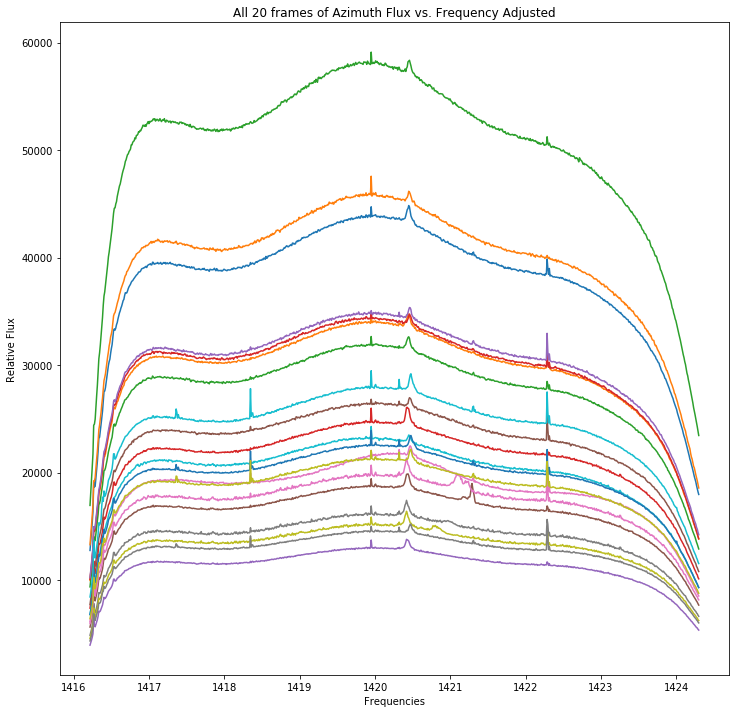

In [47]:
for i in range(0,len(az_spectra)):
    plt.plot(frequency[22:850],az_spectra[i][22:850])
plt.xlabel("Frequencies")
plt.ylabel("Relative Flux")
plt.title("All 20 frames of Azimuth Flux vs. Frequency Adjusted")

    
print("Lowest Frequency is: ",frequency[22],"Highest Frequency is: ",frequency[850])

In [48]:
az_spectramean = np.zeros(len(az_spectra))
for i in range (0,len(az_spectra)):
    az_spectramean[i] = np.mean(az_spectra[i][22:850])
    
print("The Average means for each azimuth angle are: ",az_spectramean)

The Average means for each azimuth angle are:  [37946.32130797 29398.10621739 27560.63483092 21389.59836353
 11256.70911594 16244.54649638 17179.10298068 13995.01472705
 13157.61111232 20025.63921618 19576.28894444 39620.05322585
 50259.85486836 29690.26332729 30170.2388744  22884.9015
 18352.18081643 12623.56843599 18456.36335628 24246.82210145]


Text(0.5, 1.0, 'Flux versus Azimuth Angle')

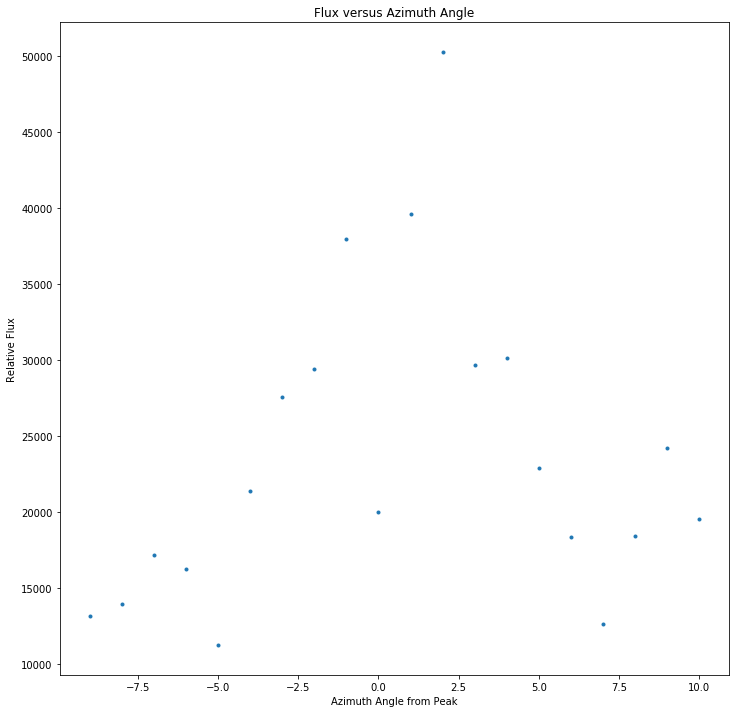

In [31]:
azimuths = np.array([-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9])

plt.plot(azimuths,az_spectramean,'.')
plt.xlabel('Azimuth Angle from Peak')
plt.ylabel('Relative Flux')
plt.title("Flux versus Azimuth Angle")

In [32]:
def gaussian (x,omega,mu,amp):
    return amp*1/(omega*np.sqrt(2*np.pi))*np.exp(-.5*((x-mu)/omega)**2)

Text(0.5, 1.0, 'Flux versus Azimuth Angle Gaussian')

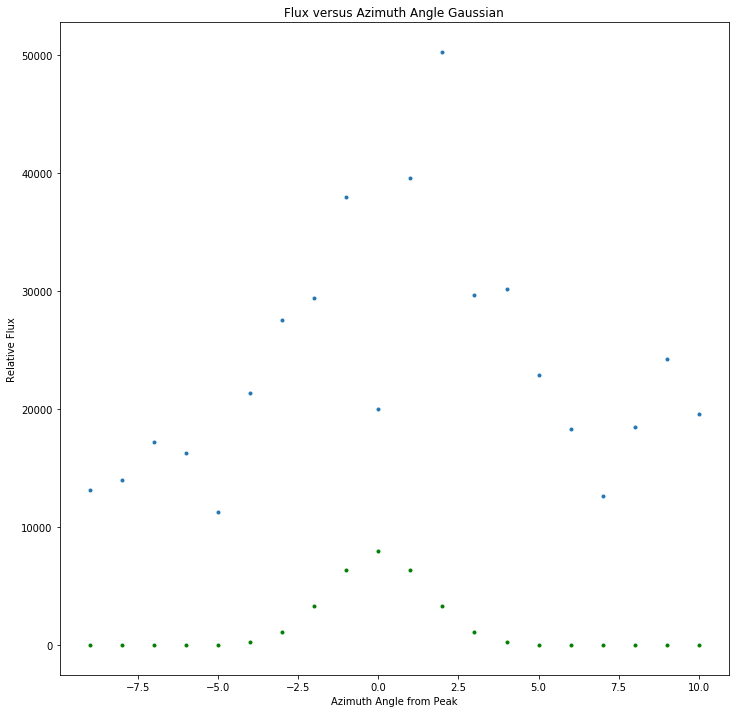

In [33]:
omega,mu,amp = (1.5,0,30000)
plt.plot(azimuths,az_spectramean,'.')
plt.plot(azimuths,gaussian(azimuths,omega,mu,amp),'g.')
plt.xlabel("Azimuth Angle from Peak")
plt.ylabel("Relative Flux")
plt.title("Flux versus Azimuth Angle Gaussian")

In [34]:
coeffs,fiterr = curve_fit(gaussian,azimuths,az_spectramean,p0=(omega,mu,amp))

print("sigma=%s, mu=%s. amplitude=%s" % (coeffs[0],coeffs[1],coeffs[2]))

sigma=6.38780588803755, mu=1.2458263132242693. amplitude=534343.0395668665


In [35]:
xforgaus = np.linspace(-9,10,20)
plt.plot(azimuths,az_spectramean,'.')
plt.plot(xforgaus,gaussian(xforgaus,coeffs[0],coeffs[1],coeffs[2]),'g-')
plt.xlabel("Azimuth Angle from Peak")
plt.ylabel("Relative Flux")
plt.title("Flux versus Azimuth Angle Gaussian Adjusted")

Text(0.5, 1.0, 'Flux versus Azimuth Angle Gaussian Adjusted')

In [36]:
fwhmaz = 2.*np.sqrt(2.*np.log(2.))*coeffs[0]
print("Full Width Half Max of Azimuth Plot= ")
print(fwhmaz)

Full Width Half Max of Azimuth Plot= 
15.042133348917547


In [37]:
el_spectra = []

for el_file in el_files:
    
    with open(el_file) as el_data:
        
        spectrum_rows2 = []
        
        for j, row2 in enumerate(el_data, start=1):
            if j%4 ==0:
                spectrum_rows2.append(row2)
                
        tot_spectrum2 = np.zeros(1024)
        for row2 in spectrum_rows2:
            temp_spec2 = row2.split(' ')
            spec2 = []
            for val2 in temp_spec2:
                if val2 !='' and val2 != '\n':
                    spec2.append(val2)
                    
            tot_spectrum2 = tot_spectrum2 + np.float64(spec2)
            
        el_spectra.append(tot_spectrum2)

In [38]:
print("The shape of the elevation spectra points are: ",np.array(el_spectra).shape)
frequency = np.linspace(1416,1426,1024)
print("Frequency points are: ")
print(frequency)

The shape of the elevation spectra points are:  (15, 1024)
Frequency points are: 
[1416.         1416.00977517 1416.01955034 ... 1425.98044966 1425.99022483
 1426.        ]


Text(0.5, 1.0, 'All 20 frames of Elevation Flux vs. Frequency')

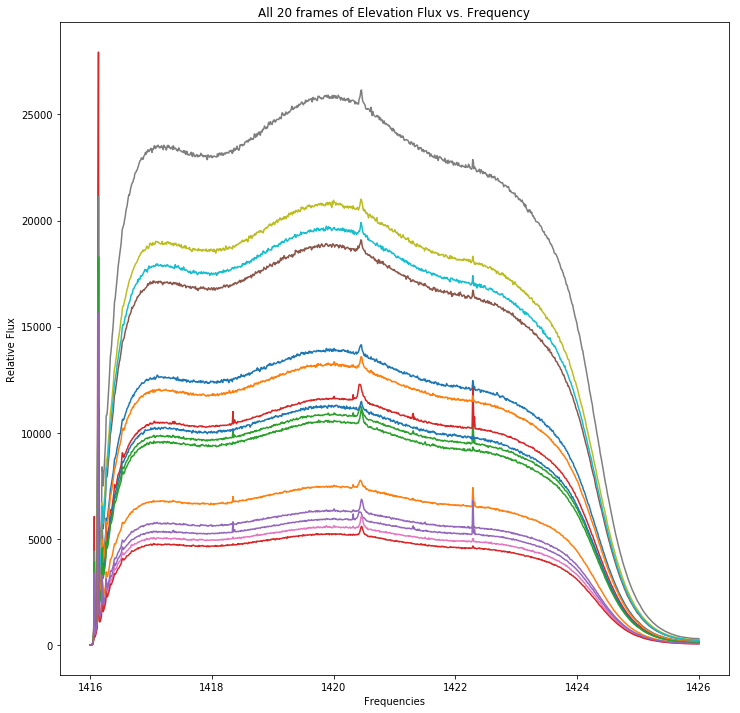

In [39]:
for i in range(0,len(el_spectra)):
    plt.plot(frequency,el_spectra[i])
plt.xlabel("Frequencies")
plt.ylabel("Relative Flux")
plt.title("All 20 frames of Elevation Flux vs. Frequency")

In [40]:
for i in range(0,len(el_spectra)):
    plt.plot(frequency[22:850],el_spectra[i][22:850])
plt.xlabel("Frequencies")
plt.ylabel("Relative Flux")
plt.title("All 20 frames of Elevation Flux vs. Frequency Adjusted")

    
print(frequency[22],frequency[850])

1416.215053763441 1424.3088954056695


In [49]:
el_spectramean = np.zeros(len(el_spectra))
for i in range (0,len(el_spectra)):
    el_spectramean[i] = np.mean(el_spectra[i][22:850])
    
print("The average value for each Elevation angle is: ",el_spectramean)

The average value for each Elevation angle is:  [12008.09239493  6484.81671135  9421.83372947 10093.00730797
  5158.57622343 16281.95625121  4832.998093   22338.66234541
 17977.80289493 16962.92524396  9722.94351087 11433.96899879
  9122.66056039  4536.87883575  5494.21781039]


Text(0.5, 1.0, 'Flux versus Elevation Angle')

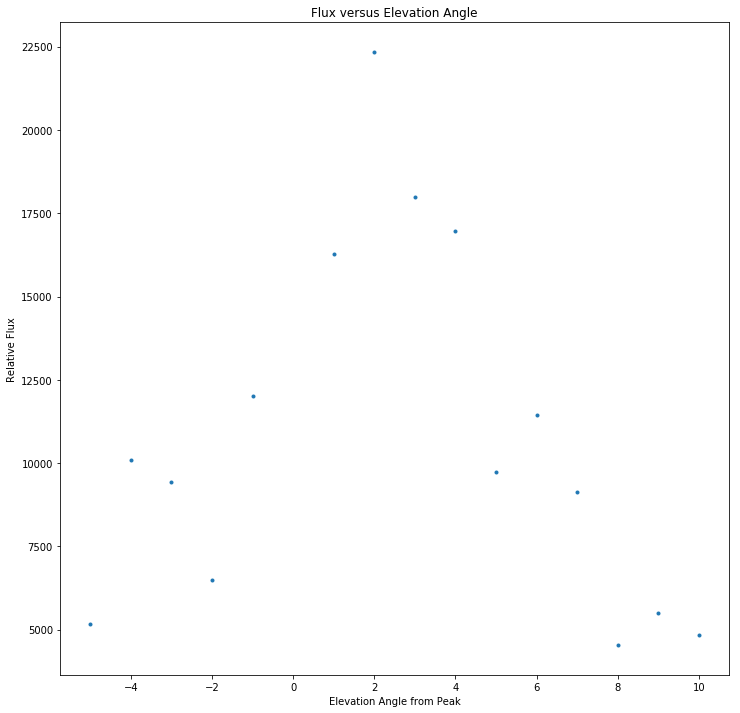

In [42]:
elevations = np.array([-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9])

plt.plot(elevations,el_spectramean,'.')
plt.xlabel('Elevation Angle from Peak')
plt.ylabel('Relative Flux')
plt.title("Flux versus Elevation Angle")

Text(0.5, 1.0, 'Flux versus Elevation Angle Gaussian')

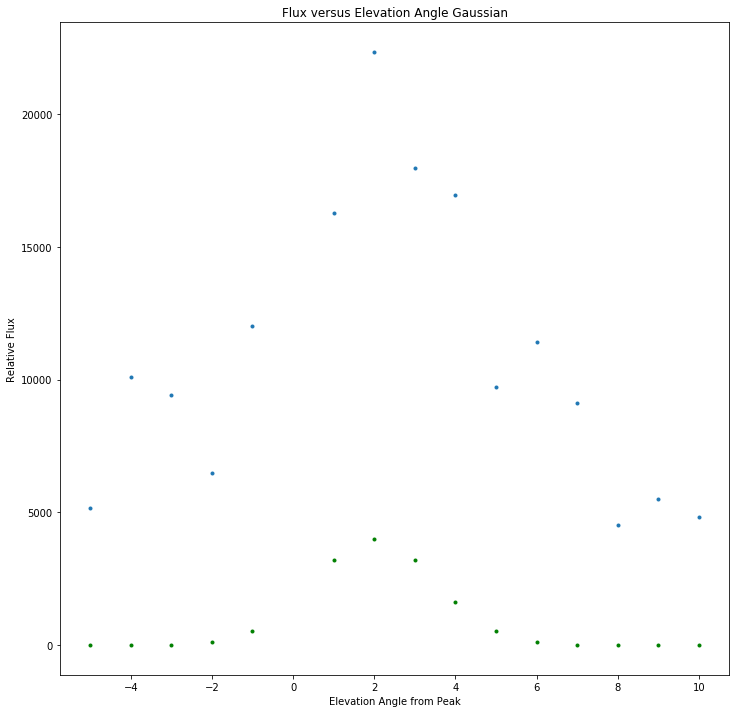

In [43]:
omega2,mu2,amp2 = (1.5,2,15000)
plt.plot(elevations,el_spectramean,'.')
plt.plot(elevations,gaussian(elevations,omega2,mu2,amp2),'g.')
plt.xlabel("Elevation Angle from Peak")
plt.ylabel("Relative Flux")
plt.title("Flux versus Elevation Angle Gaussian")

In [44]:
coeffs2,fiterr2 = curve_fit(gaussian,elevations,el_spectramean,p0=(omega2,mu2,amp2))

print("sigma=%s, mu=%s. amplitude=%s" % (coeffs2[0],coeffs2[1],coeffs2[2]))

sigma=4.178389117813482, mu=2.023409470568231. amplitude=186119.29672137112


Text(0.5, 1.0, 'Flux versus Elevation Angle Gaussian Adjusted')

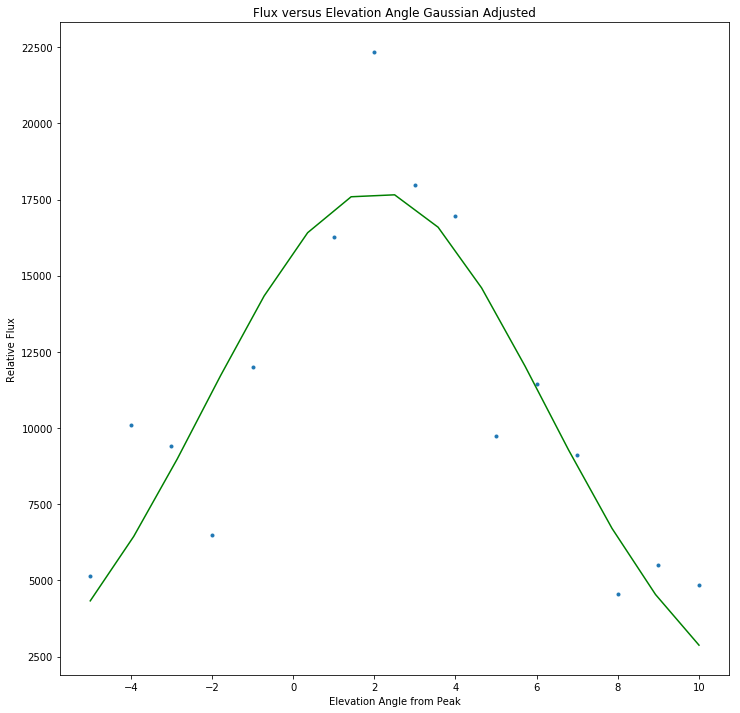

In [45]:
xforgaus2 = np.linspace(-5,10,15)
plt.plot(elevations,el_spectramean,'.')
plt.plot(xforgaus2,gaussian(xforgaus2,coeffs2[0],coeffs2[1],coeffs2[2]),'g-')
plt.xlabel("Elevation Angle from Peak")
plt.ylabel("Relative Flux")
plt.title("Flux versus Elevation Angle Gaussian Adjusted")

In [46]:
fwhmaz2 = 2.*np.sqrt(2.*np.log(2.))*coeffs2[0]
print("Full Width Half Max of Elevation Plot= ")
print(fwhmaz2)

Full Width Half Max of Elevation Plot= 
9.839354450566372
